Running the programs below allow the notebook to run properly. 

In [1]:
from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plots
%matplotlib inline

First, we read in our data by using the function: Table().read_table(csv name). 

In [2]:
bay_area = Table().read_table('data/bay_area_data.csv')
bay_area

YEAR,SERIAL,HWTSUPP,CPSID,ASECFLAG,HFLAG,METAREA,MONTH,PERNUM,CPSIDP,WTSUPP,SEX,RACE,OCC2010,INCTOT
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,1,2.01112e+13,2862.21,1,100,9620,25000
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,2,2.01112e+13,4541.27,1,100,6260,12011
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,3,2.01112e+13,4513.16,1,100,6420,25000
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,4,2.01112e+13,4513.16,1,100,9130,10000
2013,92959,2385.98,2.01212e+13,1,nan,7365,3,1,2.01212e+13,2385.98,2,652,3530,53515
2013,92959,2385.98,2.01212e+13,1,nan,7365,3,2,2.01212e+13,2385.98,1,652,3110,71000
2013,92959,2385.98,2.01212e+13,1,nan,7365,3,3,2.01212e+13,1661.4,2,652,9920,99999999
2013,92963,3137.8,2.01112e+13,1,nan,7365,3,1,2.01112e+13,3137.8,2,100,430,77800
2013,92963,3137.8,2.01112e+13,1,nan,7365,3,2,2.01112e+13,3309.68,1,100,4620,23520
2013,92963,3137.8,2.01112e+13,1,nan,7365,3,3,2.01112e+13,3309.68,1,100,4700,14120


In [3]:
# check to confirm that values are ints
type(bay_area.column(13).item(3))

int

To separate job sector, we need to first filter for jobs we want to focus on. 

In [4]:
# array of all relevant job codes
# matching job categories are in Occupations spreadsheet in Google Drive
job_codes = make_array(10, 20, 30, 100, 110, 120, 130, 140, 150, 160, 220, 300, 310, 330, 350, 360, 410, 420,
                      620, 700, 710, 720, 730, 800, 820, 940, 950, 1000, 1010, 1020, 1050, 1060, 1100, 1200, 1220,
                       1230, 1240, 1350, 1360, 1400, 1410, 1420, 1430, 1450, 1460, 1540, 1550, 1720, 1910, 1920,
                       1980, 2840, 2900, 4000, 4010, 4030, 4050, 4060, 4110, 4120, 4130, 4140, 4150, 4200, 4210,
                       4220, 4230, 4250, 4720, 5000, 7720, 7730, 7900, 8000, 8010, 8030, 8060, 8800, 8830, 7700,
                       9620, 9630, 9640)
job_codes

array([  10,   20,   30,  100,  110,  120,  130,  140,  150,  160,  220,
        300,  310,  330,  350,  360,  410,  420,  620,  700,  710,  720,
        730,  800,  820,  940,  950, 1000, 1010, 1020, 1050, 1060, 1100,
       1200, 1220, 1230, 1240, 1350, 1360, 1400, 1410, 1420, 1430, 1450,
       1460, 1540, 1550, 1720, 1910, 1920, 1980, 2840, 2900, 4000, 4010,
       4030, 4050, 4060, 4110, 4120, 4130, 4140, 4150, 4200, 4210, 4220,
       4230, 4250, 4720, 5000, 7720, 7730, 7900, 8000, 8010, 8030, 8060,
       8800, 8830, 7700, 9620, 9630, 9640])

In [5]:
jobs = Table().with_column('Jobs', job_codes)


In [6]:
import pandas as pd

df = bay_area.to_df()
bay_area = Table.from_df(df.loc[df['OCC2010'].isin(job_codes)])
bay_area

YEAR,SERIAL,HWTSUPP,CPSID,ASECFLAG,HFLAG,METAREA,MONTH,PERNUM,CPSIDP,WTSUPP,SEX,RACE,OCC2010,INCTOT
2013,92957,2862.21,2.01112e+13,1,nan,7365,3,1,2.01112e+13,2862.21,1,100,9620,25000
2013,92966,1636.31,2.01112e+13,1,nan,7365,3,1,2.01112e+13,1636.31,1,100,220,74645
2013,92966,1636.31,2.01112e+13,1,nan,7365,3,3,2.01112e+13,1589.28,2,100,4110,6240
2013,92967,3141.2,2.01112e+13,1,nan,7365,3,3,2.01112e+13,3384.73,1,100,1050,0
2013,92969,3068.09,2.01112e+13,1,nan,7365,3,1,2.01112e+13,3068.09,1,100,1410,115421
2013,92970,2892.39,2.01112e+13,1,nan,7365,3,1,2.01112e+13,2892.39,1,100,1020,117865
2013,92973,1562.79,2.01112e+13,1,nan,7365,3,1,2.01112e+13,1562.79,1,100,4220,29017
2013,92976,1748.64,2.01112e+13,1,nan,7365,3,1,2.01112e+13,1748.64,2,651,350,130030
2013,92980,1684.33,2.01112e+13,1,nan,7365,3,3,2.01112e+13,2157.3,2,651,720,571
2013,92983,3266.71,2.01112e+13,1,nan,7365,3,2,2.01112e+13,3406.81,1,100,9620,19825


In [7]:
cut_bay_area= bay_area.drop("CPSID","ASECFLAG","HWTSUPP", "HFLAG", "MONTH", "PERNUM", "CPSIDP","WTSUPP")
cut_bay_area

YEAR,SERIAL,METAREA,SEX,RACE,OCC2010,INCTOT
2013,92957,7365,1,100,9620,25000
2013,92966,7365,1,100,220,74645
2013,92966,7365,2,100,4110,6240
2013,92967,7365,1,100,1050,0
2013,92969,7365,1,100,1410,115421
2013,92970,7365,1,100,1020,117865
2013,92973,7365,1,100,4220,29017
2013,92976,7365,2,651,350,130030
2013,92980,7365,2,651,720,571
2013,92983,7365,1,100,9620,19825


In [8]:
STEM_codes= make_array(700, 1000, 1010, 1020, 1050, 1220, 1230, 1240, 1350, 1360, 1400, 1410, 1420, 1430,
    1450,1460, 1540, 1550, 1720, 1910, 1920, 1980,2840, 2900,7720, 7730, 7900, 8000, 8010,8030,
    8060, 8800, 8830)
SERVICE_codes= make_array(7700, 9620, 9630, 9640, 4000, 4010, 4030, 4050, 4060, 4110, 4120, 4130, 4140, 4150, 4720, 
    7700,9620,9630,9640)
FINANCIAL_codes= make_array(120, 800, 820, 940, 950)
CUSTODIAL_codes= make_array(4200, 4210, 4220, 4230, 4250)
MANAGEMENT_codes= make_array(130, 150, 160, 220, 30, 100, 410, 420)
STEM_MANAGER_codes=make_array(140,300,330, 350, 360, 1060, 1100)
ADMINISTRATOR_codes= make_array(10,20)
sector=list()
def job_categories2(x): 
    if any(x == i for i in STEM_codes):
        sector.append("STEM")
    elif any(x == i for i in SERVICE_codes):
        sector.append("SERVICE")
    elif any(x == i for i in FINANCIAL_codes):
        sector.append("FINANCIAL")
    elif any(x == i for i in CUSTODIAL_codes):
        sector.append("CUSTODIAL")
    elif any(x == i for i in MANAGEMENT_codes):
        sector.append("MANAGEMENT")
    elif any(x == i for i in ADMINISTRATOR_codes):
        sector.append("ADMINISTRATOR")
    elif any(x == i for i in STEM_MANAGER_codes):
        sector.append("STEM MANAGER")
    else: 
        sector.append("UNKNOWN")


for job in cut_bay_area.column("OCC2010"):
    job_categories2(job)
    
sector

['SERVICE',
 'MANAGEMENT',
 'SERVICE',
 'STEM',
 'STEM',
 'STEM',
 'CUSTODIAL',
 'STEM MANAGER',
 'UNKNOWN',
 'SERVICE',
 'STEM MANAGER',
 'STEM',
 'STEM',
 'SERVICE',
 'STEM MANAGER',
 'CUSTODIAL',
 'STEM',
 'FINANCIAL',
 'MANAGEMENT',
 'STEM',
 'STEM',
 'CUSTODIAL',
 'SERVICE',
 'UNKNOWN',
 'SERVICE',
 'SERVICE',
 'CUSTODIAL',
 'STEM',
 'FINANCIAL',
 'UNKNOWN',
 'STEM MANAGER',
 'FINANCIAL',
 'FINANCIAL',
 'STEM',
 'FINANCIAL',
 'STEM',
 'UNKNOWN',
 'STEM',
 'MANAGEMENT',
 'STEM',
 'STEM',
 'MANAGEMENT',
 'STEM',
 'STEM',
 'CUSTODIAL',
 'STEM MANAGER',
 'SERVICE',
 'FINANCIAL',
 'MANAGEMENT',
 'STEM',
 'SERVICE',
 'CUSTODIAL',
 'CUSTODIAL',
 'SERVICE',
 'SERVICE',
 'SERVICE',
 'ADMINISTRATOR',
 'MANAGEMENT',
 'MANAGEMENT',
 'UNKNOWN',
 'FINANCIAL',
 'STEM MANAGER',
 'STEM MANAGER',
 'CUSTODIAL',
 'SERVICE',
 'STEM',
 'STEM',
 'STEM',
 'UNKNOWN',
 'SERVICE',
 'CUSTODIAL',
 'CUSTODIAL',
 'STEM MANAGER',
 'SERVICE',
 'STEM',
 'SERVICE',
 'MANAGEMENT',
 'STEM',
 'STEM',
 'CUSTODIAL',
 'F

In [9]:
#sector_df = sector.to_df
with_sector = cut_bay_area.with_column('SECTOR', sector)
with_sector

YEAR,SERIAL,METAREA,SEX,RACE,OCC2010,INCTOT,SECTOR
2013,92957,7365,1,100,9620,25000,SERVICE
2013,92966,7365,1,100,220,74645,MANAGEMENT
2013,92966,7365,2,100,4110,6240,SERVICE
2013,92967,7365,1,100,1050,0,STEM
2013,92969,7365,1,100,1410,115421,STEM
2013,92970,7365,1,100,1020,117865,STEM
2013,92973,7365,1,100,4220,29017,CUSTODIAL
2013,92976,7365,2,651,350,130030,STEM MANAGER
2013,92980,7365,2,651,720,571,UNKNOWN
2013,92983,7365,1,100,9620,19825,SERVICE


Let's change race codes into what they mean. To do this, we make a dictionary. 

In [10]:
from collections import defaultdict
race_dict = {100: 'White', 200: "Black", 300: 'Indigenous',650:"Asian Pacific Islander" }
race_dict = defaultdict(lambda: 'Other', race_dict)
race = list()
#for k, v in race_dict.iteritems():
    #if v is None:
        #dict [k] = 'Other'
for count, k in enumerate(with_sector.column("RACE")):
    #print(k)
    #print(race_dict[with_sector.column("RACE")[count]])
    race.append(race_dict[with_sector.column("RACE")[count]])

with_race = with_sector.with_column('RACE', race)
with_race
    


YEAR,SERIAL,METAREA,SEX,RACE,OCC2010,INCTOT,SECTOR
2013,92957,7365,1,White,9620,25000,SERVICE
2013,92966,7365,1,White,220,74645,MANAGEMENT
2013,92966,7365,2,White,4110,6240,SERVICE
2013,92967,7365,1,White,1050,0,STEM
2013,92969,7365,1,White,1410,115421,STEM
2013,92970,7365,1,White,1020,117865,STEM
2013,92973,7365,1,White,4220,29017,CUSTODIAL
2013,92976,7365,2,Other,350,130030,STEM MANAGER
2013,92980,7365,2,Other,720,571,UNKNOWN
2013,92983,7365,1,White,9620,19825,SERVICE


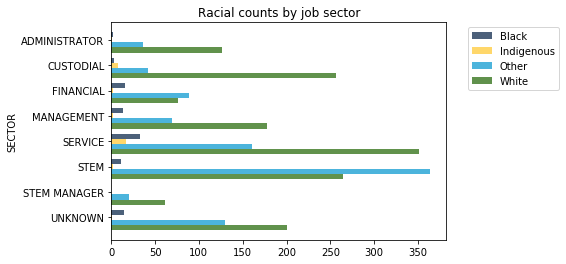

In [14]:
# plot sector+race
t = with_race.drop("INCTOT", "METAREA", "SERIAL","YEAR","OCC2010", 'SEX')
t = t.pivot("RACE", "SECTOR")
t.barh('SECTOR')
plots.title('Racial counts by job sector')

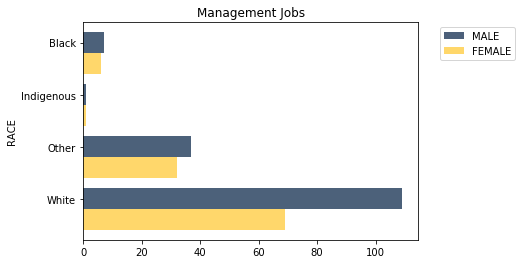

In [15]:
management_jobs = with_race.where("SECTOR", are.equal_to("MANAGEMENT")).drop("INCTOT", "SECTOR", "METAREA", "SERIAL","YEAR","OCC2010")
management_jobs = management_jobs.pivot("SEX", "RACE").relabel("1", "MALE"). relabel("2", "FEMALE")
management_jobs.barh('RACE')
plots.title('Management Jobs')

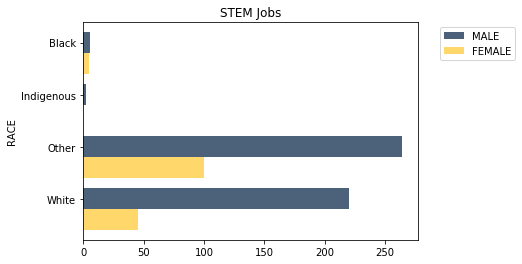

In [16]:
stem_jobs = with_race.where("SECTOR", are.equal_to("STEM")).drop("INCTOT", "SECTOR", "METAREA", "SERIAL","YEAR","OCC2010")
stem_jobs = stem_jobs.pivot("SEX", "RACE").relabel("1", "MALE"). relabel("2", "FEMALE")
stem_jobs.barh('RACE')
plots.title('STEM Jobs')

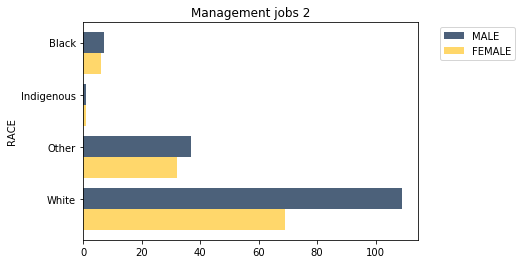

In [17]:
custodial_jobs = with_race.where("SECTOR", are.equal_to("MANAGEMENT")).drop("INCTOT", "SECTOR", "METAREA", "SERIAL","YEAR","OCC2010")
custodial_jobs = custodial_jobs.pivot("SEX", "RACE").relabel("1", "MALE"). relabel("2", "FEMALE")
custodial_jobs.barh('RACE')
plots.title('Management jobs 2')

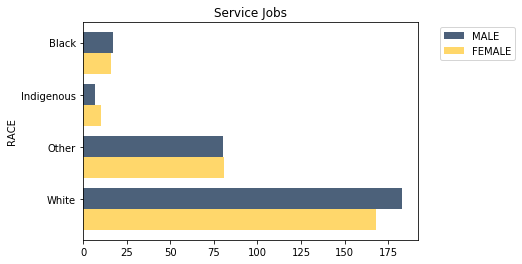

In [18]:
service_jobs = with_race.where("SECTOR", are.equal_to("SERVICE")).drop("INCTOT", "SECTOR", "METAREA", "SERIAL","YEAR","OCC2010")
service_jobs = service_jobs.pivot("SEX", "RACE").relabel("1", "MALE"). relabel("2", "FEMALE")
service_jobs.barh('RACE')
plots.title('Service Jobs')

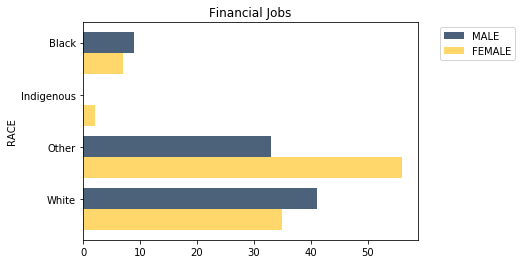

In [19]:
financial_jobs = with_race.where("SECTOR", are.equal_to("FINANCIAL")).drop("INCTOT", "SECTOR", "METAREA", "SERIAL","YEAR","OCC2010")
financial_jobs = financial_jobs.pivot("SEX", "RACE").relabel("1", "MALE"). relabel("2", "FEMALE")
financial_jobs.barh('RACE')
plots.title('Financial Jobs')

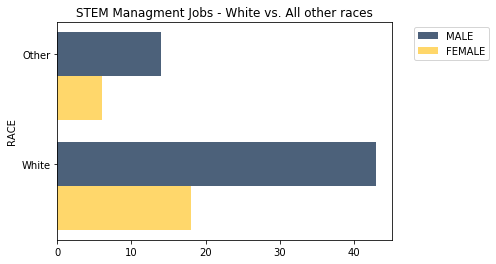

In [21]:
stemmanager_jobs = with_race.where("SECTOR", are.equal_to("STEM MANAGER")).drop("INCTOT", "SECTOR", "METAREA", "SERIAL","YEAR","OCC2010")
stemmanager_jobs = stemmanager_jobs.pivot("SEX", "RACE").relabel("1", "MALE"). relabel("2", "FEMALE")
stemmanager_jobs.barh('RACE')
plots.title('STEM Managment Jobs - White vs. All other races')

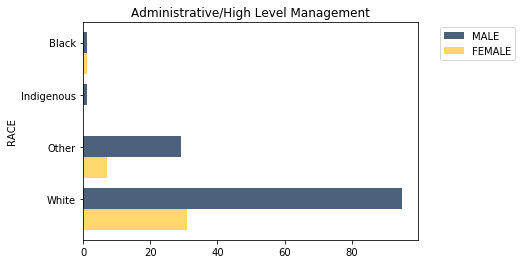

In [22]:
administrator_jobs = with_race.where("SECTOR", are.equal_to("ADMINISTRATOR")).drop("INCTOT", "SECTOR", "METAREA", "SERIAL","YEAR","OCC2010")
administrator_jobs = administrator_jobs.pivot("SEX", "RACE").relabel("1", "MALE"). relabel("2", "FEMALE")
administrator_jobs.barh('RACE')
plots.title('Administrative/High Level Management')

By looking at the average mean of each part of the sample, we see some differences. 

In [23]:
men_income= with_race.where("SEX", are.equal_to(1)).column(6)
np.mean(men_income)

104469.42997382199

In [24]:
white_men_income=with_sector.where("SEX", are.equal_to(1)).where("RACE", are.equal_to(100)).column(6)
np.mean(white_men_income)

111371.21069868996

In [25]:
women_income= with_sector.where("SEX", are.equal_to(2)).column(6)
np.mean(women_income)

57354.12230919765

In [26]:
white_women_income=with_sector.where("RACE", are.equal_to(100)).where("SEX", are.equal_to(2)).column(6)
np.mean(white_women_income)

53339.944723618093

This type of comparison isn't very reliable. We will perform a p-value test to determine if the change of income across races/ sex is statistically significant. To do this we first need to bootstrap our sample to make a 95% confidnece interval of the estimated population mean. 

In [27]:
def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample.select(label)
    medians = make_array()
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resampled_median = percentile(50, bootstrap_sample.column(0))
        medians = np.append(medians, resampled_median)

    return medians

In [28]:
all_income_medians= bootstrap_median(with_sector, "INCTOT", 1000)
l_all_income_medians = percentile(2.5, all_income_medians)
r_all_income_medians = percentile(97.5, all_income_medians)
make_array(l_all_income_medians, r_all_income_medians)


array([ 53000.,  60150.])

In [29]:
men=with_sector.where("SEX", are.equal_to(1))
men_medians= bootstrap_median(men, "INCTOT", 1000)
leftmen = percentile(2.5, men_medians)
rightmen = percentile(97.5, men_medians)
menCI= make_array(leftmen, rightmen)

women=with_sector.where("SEX", are.equal_to(2))
women_medians= bootstrap_median(women, "INCTOT", 1000)
leftwomen = percentile(2.5, women_medians)
rightwomen = percentile(97.5, women_medians)
womenCI= make_array(leftwomen, rightwomen)

white_men=men.where("RACE", are.equal_to(100))
white_men_medians= bootstrap_median(white_men, "INCTOT", 1000)
leftwhite_men = percentile(2.5,white_men_medians)
rightwhite_men = percentile(97.5, white_men_medians)
white_menCI= make_array(leftwhite_men, rightwhite_men)

white_women=women.where("RACE", are.equal_to(100))
white_women_medians= bootstrap_median(white_women, "INCTOT", 1000)
leftwhite_women = percentile(2.5, white_women_medians)
rightwhite_women = percentile(97.5, white_women_medians)
white_womenCI= make_array(leftwhite_women, rightwhite_women)

black_men=men.where("RACE", are.equal_to(200))
black_men_medians= bootstrap_median(black_men, "INCTOT", 1000)
leftblack_men = percentile(2.5, black_men_medians)
rightblack_men = percentile(97.5, black_men_medians)
black_menCI= make_array(leftblack_men, rightblack_men)

black_women=women.where("RACE", are.equal_to(200))
black_women_medians= bootstrap_median(black_women, "INCTOT", 1000)
leftblack_women = percentile(2.5, black_women_medians)
rightblack_women = percentile(97.5, black_women_medians)
black_womenCI= make_array(leftblack_women, rightblack_women)

asian_men=men.where("RACE", are.equal_to(651))
asian_men_medians= bootstrap_median(asian_men, "INCTOT", 1000)
leftasian_men = percentile(2.5, asian_men_medians)
rightasian_men = percentile(97.5, asian_men_medians)
asian_menCI= make_array(leftasian_men, rightasian_men)

asian_women=women.where("RACE", are.equal_to(651))
asian_women_medians= bootstrap_median(asian_women, "INCTOT", 1000)
leftasian_women = percentile(2.5, asian_women_medians)
rightasian_women = percentile(97.5, asian_women_medians)
asian_womenCI= make_array(leftasian_women, rightasian_women)

other_men=men.where("RACE", are.above(651))
other_men_medians= bootstrap_median(other_men, "INCTOT", 1000)
leftother_men = percentile(2.5, other_men_medians)
rightother_men = percentile(97.5, other_men_medians)
other_menCI= make_array(leftother_men, rightother_men)

other_women=women.where("RACE", are.above(651))
other_women_medians= bootstrap_median(other_women, "INCTOT", 1000)
leftother_women = percentile(2.5, other_women_medians)
rightother_women = percentile(97.5, other_women_medians)
other_womenCI= make_array(leftother_women, rightother_women)


In [30]:
print("For men, the median 95% Confidence Interval is", menCI)
print("For women, the median 95% Confidence Interval is", womenCI)
print("For White men, the median 95% Confidence Interval is", white_menCI)
print("For White women, the median 95% Confidence Interval is", white_womenCI)
print("For Black men, the median 95% Confidence Interval is", black_menCI)
print("For Black women, the median 95% Confidence Interval is", black_womenCI)
print("For Asian PI men, the median 95% Confidence Interval is", asian_menCI)
print("For Asian PI women, the median 95% Confidence Interval is", asian_womenCI)
print("For men of other races, the median 95% Confidence Interval is", other_menCI)
print("For women of other races, the median 95% Confidence Interval is", other_womenCI)

For men, the median 95% Confidence Interval is [ 70000.  80000.]
For women, the median 95% Confidence Interval is [ 36880.  41600.]
For White men, the median 95% Confidence Interval is [ 60200.  75000.]
For White women, the median 95% Confidence Interval is [ 27025.  36005.]
For Black men, the median 95% Confidence Interval is [ 38620.  82001.]
For Black women, the median 95% Confidence Interval is [ 32000.  60576.]
For Asian PI men, the median 95% Confidence Interval is [ 80000.  92000.]
For Asian PI women, the median 95% Confidence Interval is [ 48330.  65002.]
For men of other races, the median 95% Confidence Interval is [ 30000.  92000.]
For women of other races, the median 95% Confidence Interval is [ 30000.  50577.]


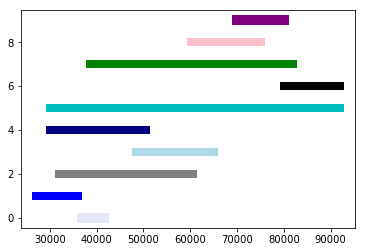

In [31]:
plots.plot(menCI, make_array(9, 9), color='purple', lw=10)
plots.plot(womenCI, make_array(0, 0), color='lavender', lw=10)
plots.plot(white_menCI, make_array(8, 8), color='pink', lw=8)
plots.plot(white_womenCI, make_array(1, 1), color='b', lw=8)
plots.plot(black_menCI, make_array(7, 7), color='g', lw=8)
plots.plot(black_womenCI, make_array(2, 2), color='grey', lw=8)
plots.plot(asian_menCI, make_array(6,6), color='black', lw=8)
plots.plot(asian_womenCI, make_array(3, 3), color='lightblue', lw=8)
plots.plot(other_menCI, make_array(5, 5), color='c', lw=8)
plots.plot(other_womenCI, make_array(4, 4), color='navy', lw=8)
#add income axes

Markdown about the variance of CI dependent on sample size but differences are low key clear. 

p-value tests
According to these 95% confidence intervals, the median for . . . is statistically significant . . . 

# Feedback:
- add note about races encompassed by "other"
- Also do a bar chart of gender/racial spread of this population for ALL JOBS, so that these distributions are more relative
- I added titles to plots - make sure all plots have titles, bc students won't be reading code
- maybe don't put white people first for everything lol
- like it would be more interesting to see average income for a different race! or all races!
- I know you will explain what confidence intervals are woohoo
- add legend/strategic color choices to CI plot (I can recommend a color scheme lol)

# As a practice, always clear all output from cells before pushing to repo
## Cell > All Output > Clear
### This should help with some of the git issues!